In [2]:
import pandas as pd
data = pd.read_csv('raion_prices.csv')
data.head()

,sub_area,log_price,log_price_per_log_fullsq
0,Ajeroport,15.941682,4.076548
1,Akademicheskoe,15.915494,4.003658
2,Alekseevskoe,15.795134,4.119120
3,Altuf'evskoe,15.312836,4.084878
4,Arbat,16.354411,4.191241


In [5]:
import numpy as np
price = np.array(data['log_price'])
sqft = np.array(data['log_price_per_log_fullsq'])
#full_sq = np.array(data['full_sq'])
x = np.dstack([price, sqft])
#this is done because of how dstack works, it gives us a usable array
x = x[0]
x

array([[ 15.94168239,   4.07654828],
       [ 15.91549394,   4.00365751],
       [ 15.79513354,   4.1191203 ],
       [ 15.31283585,   4.08487838],
       [ 16.35441125,   4.19124136],
       [ 15.67070475,   4.08797661],
       [ 16.09122665,   4.04702983],
       [ 16.05271324,   4.10874956],
       [ 15.52712899,   4.03353257],
       [ 15.59424709,   4.04483654],
       [ 15.41330986,   4.03936589],
       [ 15.3845094 ,   4.07711612],
       [ 15.51767601,   4.13059538],
       [ 15.59290966,   4.02435785],
       [ 15.66181734,   4.05059446],
       [ 15.48087303,   4.22503653],
       [ 15.84860871,   4.1439788 ],
       [ 15.64201122,   4.08137802],
       [ 15.64596829,   4.07220788],
       [ 15.71600368,   4.11396384],
       [ 15.90310946,   4.05933349],
       [ 15.46061812,   4.12137816],
       [ 15.98175317,   3.99602988],
       [ 16.17849035,   4.08387521],
       [ 15.80824438,   4.05678976],
       [ 15.70023399,   4.09112679],
       [ 16.17007764,   4.02426701],
 

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans()

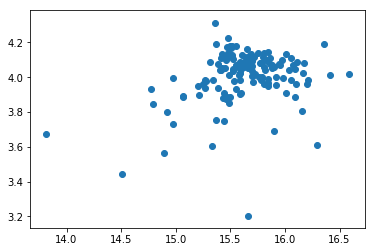

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
X_normalized = sklearn.preprocessing.normalize(x, norm='l2')
plt.scatter(price,sqft)
plt.show()

kmeans.set_params(n_clusters = 5)
kmeans.fit(X_normalized)

In [8]:
kmeans.cluster_centers_

array([[ 0.96720902,  0.25395215],
       [ 0.97462771,  0.22356484],
       [ 0.96976841,  0.24399669]])

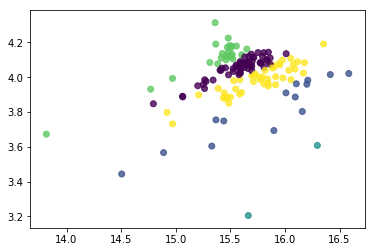

In [11]:
plt.scatter(price, sqft, c = kmeans.labels_, alpha = 0.8)
plt.show()